In [121]:
import os
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Change to root path
if os.path.basename(os.getcwd()) != 'PConv-Keras':
    os.chdir('..')
    
# getcwd -> current working directory
# path.basename -> take the file name that we inside

from libs.pconv_model import PConvUnet
from libs.util import MaskGenerator, ImageChunker

%load_ext autoreload
%autoreload 2

# SETTINGS
BATCH_SIZE = 4

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load trained model weights

In [106]:
model20epochs = PConvUnet(vgg_weights=None, inference_only=True)
model20epochs.load("D:/School n Stuff/3.2 BAHAR/Inpainting Project/Methods/Partial Convolutions/logsweights.20-30.06.h5", train_bn=False)

model10epochs = PConvUnet(vgg_weights=None, inference_only=True)
model10epochs.load("D:/School n Stuff/3.2 BAHAR/Inpainting Project/Methods/Partial Convolutions/logsweights.10-38.89.h5", train_bn=False)

### Specify the file paths

In [127]:
SAMPLE_IMAGE = "C:/Users/fzehr/PycharmProjects/image_inpainting/Denemeler ve Çıktılar/deneme3.jpg"
MASK_IMAGE = "C:/Users/fzehr/PycharmProjects/image_inpainting/mask2_2.jpg"
OUTPUT_IMAGE = "C:/Users/fzehr/PycharmProjects/image_inpainting/Denemeler ve Çıktılar/Maske 2/deneme3_2.png"
OUTPUT_DIR = "C:/Users/fzehr/PycharmProjects/image_inpainting/Denemeler/My Test Case/Maske 2/"
TEST_DIR = "C:/Users/fzehr/PycharmProjects/image_inpainting/my test case/"

In [130]:
def plot_and_save_images(images, filename, s=5):
    _, axes = plt.subplots(1, len(images), figsize=(s*len(images), s))
    if len(images) == 1:
        axes = [axes]
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.set_axis_off()
        filename = filename.split('.')
        plt.savefig(OUTPUT_DIR + filename[0] + "_2_10epochs.png")
    # plt.show()

## Testing on a directory

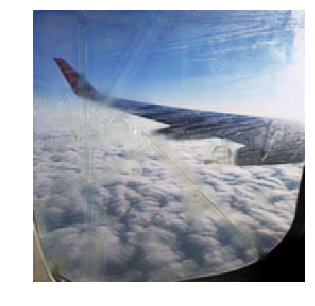

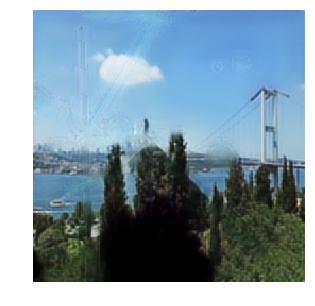

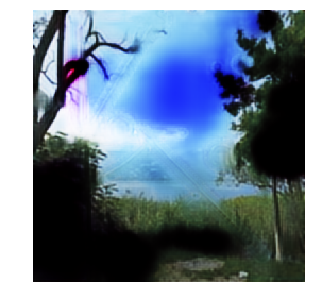

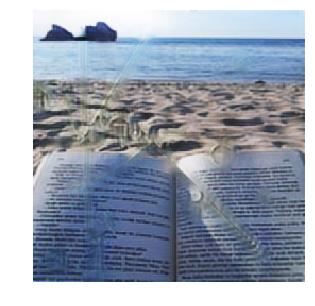

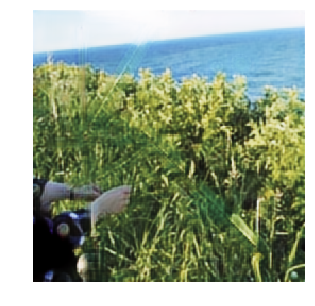

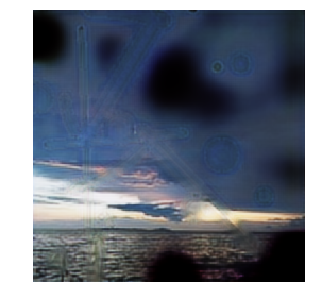

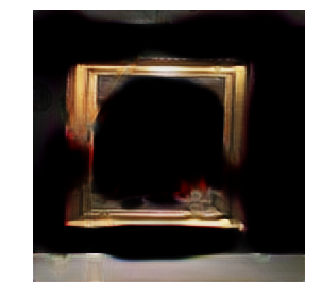

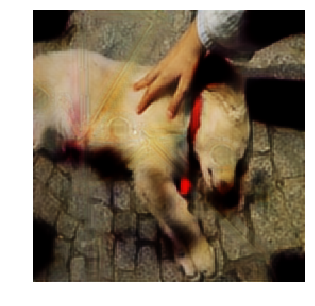

In [131]:
for filename in os.listdir(TEST_DIR):
    im = Image.open(TEST_DIR + filename)
    im = np.array(im) / 255
    im = np.reshape(im, [-1, 256, 256, 3])
    
    # mask = Image.open(MASK_IMAGE)
    # mask = 1 - np.array(mask) 
    
    mask_generator = MaskGenerator(256, 256, 3, rand_seed=42)
    mask = mask_generator.sample()
    
    mask = np.reshape(mask, [-1, 256, 256, 3])
    im[mask == 0] = 1
    pred_img = model10epochs.predict([im, mask])
    plot_and_save_images(pred_img, filename)

## Test on an image

In [104]:
im = Image.open(SAMPLE_IMAGE)
im = np.array(im) / 255
im = np.reshape(im, [-1, 256, 256, 3])

# mask = Image.open(MASK_IMAGE)
# mask = 1 - np.array(mask) 

mask_generator = MaskGenerator(256, 256, 3, rand_seed=42)
mask = mask_generator.sample()

mask = np.reshape(mask, [-1, 256, 256, 3])
im[mask == 0] = 1
pred_img = model20epochs.predict([im, mask])

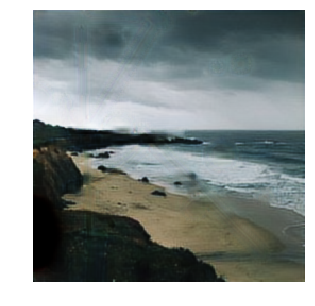

In [105]:
plot_and_save_images(pred_img)

## Create and save mask as jpg

In [78]:
mask_generator = MaskGenerator(256, 256, 3, rand_seed=42)
mask = mask_generator.sample()
mask = Image.fromarray(mask, 'RGB')
mask.show()

In [79]:
mask.save("C:/Users/fzehr/PycharmProjects/image_inpainting/mask2_2.jpg")